In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
df = df.drop(["Name","Cabin","Ticket"], axis =1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C
3,4,1,1,female,35.0,1,0,53.1000,S
6,7,0,1,male,54.0,0,0,51.8625,S
10,11,1,3,female,4.0,1,1,16.7000,S
11,12,1,1,female,58.0,0,0,26.5500,S


In [9]:
df.Parch.value_counts()

Parch
0    122
1     37
2     23
4      1
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Sex          183 non-null    object 
 4   Age          183 non-null    float64
 5   SibSp        183 non-null    int64  
 6   Parch        183 non-null    int64  
 7   Fare         183 non-null    float64
 8   Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 14.3+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
le

LabelEncoder()

In [14]:
from pandas.api.types import is_numeric_dtype

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [16]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col] = le.fit_transform(df[col])

In [17]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,0,38.0,1,0,71.2833,0
3,4,1,1,0,35.0,1,0,53.1000,2
6,7,0,1,1,54.0,0,0,51.8625,2
10,11,1,3,0,4.0,1,1,16.7000,2
11,12,1,1,0,58.0,0,0,26.5500,2


In [18]:
df.Embarked.value_counts()

Embarked
2    116
0     65
1      2
Name: count, dtype: int64

(0.0, 10.0)

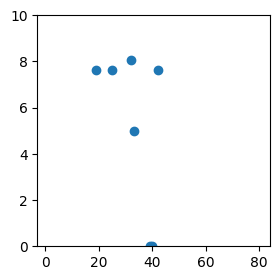

In [19]:
# data visualizat
plt.figure(figsize=(3,3))
plt.scatter(df.Age, df.Fare)
plt.ylim(0,10)

<Axes: xlabel='Age', ylabel='Fare'>

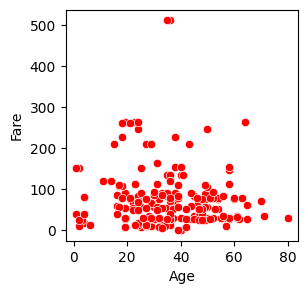

In [20]:
plt.figure(figsize=(3,3))
sns.scatterplot(x=df.Age, y=df.Fare, color = "r")

In [21]:
df.Sex.value_counts()

Sex
1    95
0    88
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x1eb68122150>,
 [Text(0, 0, 'male'), Text(1, 0, 'female')])

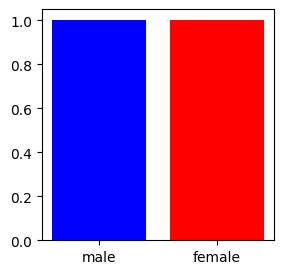

In [22]:
plt.figure(figsize=(3,3))
plt.bar(df.Sex, df.Survived, color = ["r","b"])
plt.xticks(ticks= [0,1], labels= ["male", "female"])

C:\Users\user\AppData\Local\Temp\ipykernel_18036\3536112387.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Sex'], y=df['Survived'], palette=color)


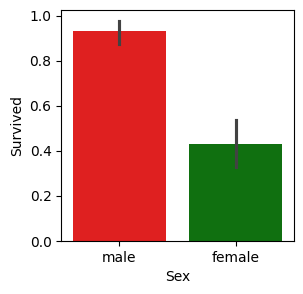

In [23]:
plt.figure(figsize=(3, 3))  # Set the figure size
color = ["red", "green"]
sns.barplot(x=df['Sex'], y=df['Survived'], palette=color)
# Set custom x-ticks (male and female for Sex column)
plt.xticks(ticks=[0, 1], labels=["male", "female"])

plt.show()


<Axes: title={'center': 'Fare'}, xlabel='Sex'>

<Figure size 300x300 with 0 Axes>

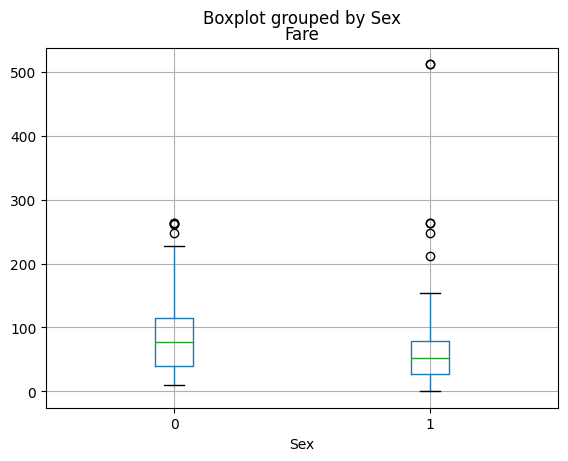

In [24]:
plt.figure(figsize=(3, 3))
df.boxplot(column = "Fare", by ="Sex")

<Axes: ylabel='Age'>

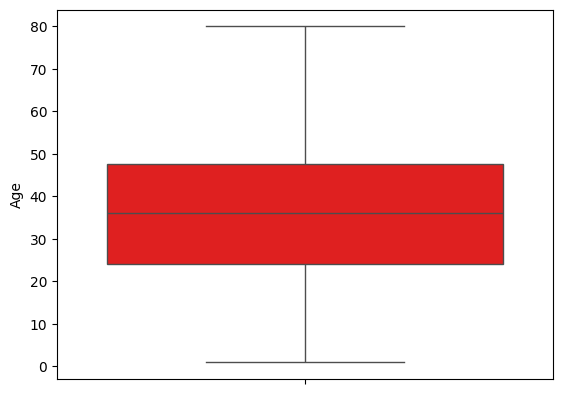

In [25]:
sns.boxplot(df.Age, color ="r")

array([<Axes: title={'center': 'Age'}, xlabel='Survived'>,
       <Axes: title={'center': 'Fare'}, xlabel='Survived'>], dtype=object)

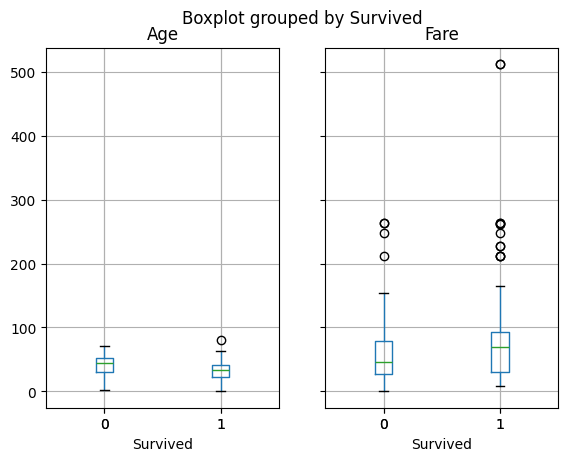

In [26]:
df.boxplot(column=["Age", "Fare"], by="Survived")

In [27]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,0,38.0,1,0,71.2833,0
3,4,1,1,0,35.0,1,0,53.1000,2


In [28]:
x = df.drop("Survived", axis = 1)
y = df[["Survived"]]

In [29]:
y.head()

,Survived
1,1
3,1
6,0
10,1
11,1


In [30]:
y.info

<bound method DataFrame.info of      Survived
1           1
3           1
6           0
10          1
11          1
..        ...
871         1
872         0
879         1
887         1
889         1

[183 rows x 1 columns]>

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=.2, random_state=1)

In [32]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(146, 8)
(146, 1)
(37, 8)
(37, 1)


In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors=7)

In [35]:
knn.fit(xtrain,ytrain)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [36]:
knn.score(xtrain,ytrain)

0.7602739726027398

In [37]:
knn.score(xtest,ytest)

0.7567567567567568

In [38]:
ypred = knn.predict(xtest)

In [39]:
ypred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0])

In [40]:
ytest

,Survived
297,0
456,0
581,1
871,1
268,1
789,0
193,1
867,0
730,1
585,1


In [41]:
predic= pd.DataFrame(ypred)

In [42]:
predic

,0
0,1
1,0
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [43]:
from sklearn.metrics import accuracy_score, f1_score

In [44]:
accur= accuracy_score(ypred, ytest)

In [45]:
accur

0.7567567567567568

In [46]:
accur1= f1_score(ypred, ytest)

In [47]:
accur1

0.8235294117647058

In [48]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,0,38.0,1,0,71.2833,0
3,4,1,1,0,35.0,1,0,53.1000,2
6,7,0,1,1,54.0,0,0,51.8625,2
10,11,1,3,0,4.0,1,1,16.7000,2
11,12,1,1,0,58.0,0,0,26.5500,2


<Axes: >

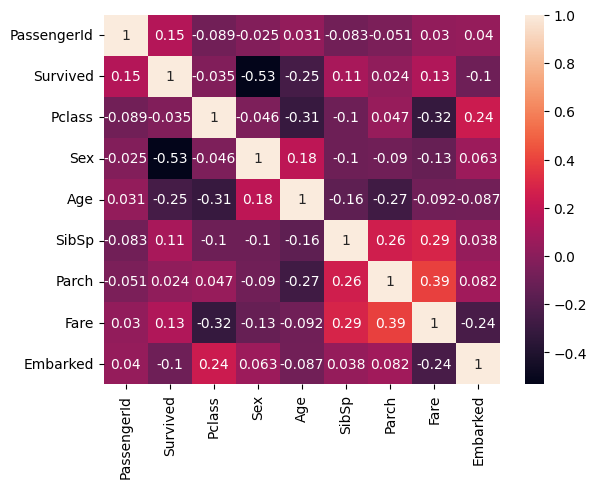

In [49]:
sns.heatmap(df.corr(), annot= True)


In [50]:
y_pred = knn.predict(xtest)

In [51]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0])

In [52]:
ytest

,Survived
297,0
456,0
581,1
871,1
268,1
789,0
193,1
867,0
730,1
585,1


In [53]:
xtrain.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [54]:
ytrain.columns

Index(['Survived'], dtype='object')

In [55]:
data = {
    "PassengerId" : [10],
    'Pclass' : [3],
    "Sex" : [0],
    "Age" : [50],
    'SibSp' : [3],
    "Parch" : [2],
   "Fare" : [1000],
    'Pclass' : [3],
    "Embarked" : [1]
}
df = pd.DataFrame(data)
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,10,3,0,50,3,2,1000,1


In [56]:
xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
632,633,1,1,32.0,0,0,30.5000,0
700,701,1,0,18.0,1,0,227.5250,0
772,773,2,0,57.0,0,0,10.5000,2
712,713,1,1,48.0,1,0,52.0000,2
591,592,1,0,52.0,1,0,78.2667,0
...,...,...,...,...,...,...,...,...
647,648,1,1,56.0,0,0,35.5000,0
679,680,1,1,36.0,0,1,512.3292,0
345,346,2,0,24.0,0,0,13.0000,2
690,691,1,1,31.0,1,0,57.0000,2


In [57]:
y_pred = knn.predict(df)

In [58]:
y_pred

array([1])

In [59]:
knn.predict(xtrain)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [60]:
ytrain

,Survived
632,1
700,1
772,0
712,1
591,1
...,...
647,1
679,1
345,1
690,1


In [61]:
#!pip install pickle

In [62]:
# save model 
import pickle

In [63]:
pickle.dump(knn, open("knn_model.pkl", "wb"))

In [80]:
# Extension
accuracy_train_list = []
accuracy_test_list = []
f1_score_train = []
f1_score_test = []


for i in range(1,70):
    print("k", i)
    #model initialization]

    # initialization
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(xtrain, ytrain)
   # Test the training data
    y_pred_train = neigh.predict(xtrain)
    accuracy_train = accuracy_score(y_pred_train,ytrain)
    accuracy_train_list.append(accuracy_train)
    f1_train = f1_score(y_pred_train,ytrain)
    f1_score_train.append(f1_train)

    

    y_pred_test = neigh.predict(xtest)
    accuracy_test = accuracy_score(y_pred_test,ytest)
    accuracy_test_list.append(accuracy_test)
    f1_test = f1_score(y_pred_test,ytest)
    f1_score_test.append(f1_test)

    print(accuracy_train, accuracy_test)
    print(f1_test, f1_train)
    print()

# Find the k value with the highest test accuracy and F1-score
import numpy as np
best_k_accuracy = k_values[np.argmax(accuracy_test_list)]
best_accuracy = max(accuracy_test_list)

best_k_f1 = k_values[np.argmax(f1_score_test)]
best_f1 = max(f1_score_test)

print(f"Best k for highest accuracy: {best_k_accuracy}, Accuracy: {best_accuracy:.4f}")
print(f"Best k for highest F1-score: {best_k_f1}, F1-score: {best_f1:.4f}")

k 1
1.0 0.5945945945945946
0.7058823529411765 1.0

k 2
0.8424657534246576 0.43243243243243246
0.5116279069767442 0.8685714285714285

k 3


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8561643835616438 0.5675675675675675
0.68 0.8975609756097561

k 4
0.821917808219178 0.5945945945945946
0.6808510638297872 0.8617021276595744

k 5
0.773972602739726 0.6486486486486487
0.7346938775510204 0.8421052631578947

k 6


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7945205479452054 0.6216216216216216
0.6956521739130435 0.8469387755102041

k 7
0.7602739726027398 0.7567567567567568
0.8235294117647058 0.8387096774193549

k 8
0.7602739726027398 0.6216216216216216
0.6956521739130435 0.8309178743961353

k 9
0.7328767123287672 0.7297297297297297
0.8148148148148148 0.8251121076233184

k 10
0.726027397260274 0.6756756756756757
0.76 0.8095238095238095

k 11


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: Data

0.726027397260274 0.6216216216216216
0.7407407407407407 0.8165137614678899

k 12
0.7465753424657534 0.5945945945945946
0.7058823529411765 0.827906976744186

k 13
0.7397260273972602 0.6216216216216216
0.7407407407407407 0.8288288288288288

k 14
0.7328767123287672 0.5945945945945946
0.7169811320754716 0.821917808219178

k 15
0.726027397260274 0.5945945945945946
0.7169811320754716 0.8214285714285714

k 16


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: Data

0.726027397260274 0.5945945945945946
0.7169811320754716 0.8181818181818182

k 17
0.7123287671232876 0.5945945945945946
0.7169811320754716 0.8125

k 18
0.7123287671232876 0.5675675675675675
0.6923076923076923 0.8090909090909091

k 19
0.6986301369863014 0.6216216216216216
0.7407407407407407 0.8035714285714286

k 20
0.7054794520547946 0.6216216216216216
0.7407407407407407 0.8054298642533937

k 21


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: Data

0.6986301369863014 0.6216216216216216
0.7407407407407407 0.8035714285714286

k 22
0.7054794520547946 0.5675675675675675
0.6923076923076923 0.8054298642533937

k 23
0.6986301369863014 0.5945945945945946
0.7169811320754716 0.8035714285714286

k 24
0.6986301369863014 0.5675675675675675
0.6923076923076923 0.8018018018018018

k 25
0.6917808219178082 0.5405405405405406
0.6792452830188679 0.801762114537445

k 26
0.6917808219178082 0.5405405405405406
0.6792452830188679 0.8

k 27


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: Data

0.6575342465753424 0.6486486486486487
0.7796610169491526 0.7863247863247863

k 28
0.6712328767123288 0.6486486486486487
0.7796610169491526 0.7931034482758621

k 29
0.6917808219178082 0.6486486486486487
0.7796610169491526 0.8117154811715481

k 30
0.6712328767123288 0.6486486486486487
0.7796610169491526 0.7966101694915254

k 31
0.6712328767123288 0.6756756756756757
0.8 0.7983193277310925

k 32
0.678082191780822 0.6756756756756757
0.8 0.8

k 33


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: Data

0.6917808219178082 0.6756756756756757
0.8 0.8132780082987552

k 34
0.6986301369863014 0.6216216216216216
0.75 0.811965811965812

k 35
0.684931506849315 0.6216216216216216
0.7666666666666667 0.8114754098360656

k 36
0.6643835616438356 0.5945945945945946
0.7368421052631579 0.7896995708154506

k 37
0.6712328767123288 0.6486486486486487
0.7868852459016393 0.8032786885245902

k 38
0.6712328767123288 0.5675675675675675
0.7241379310344828 0.8

k 39


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: Data

0.6712328767123288 0.6486486486486487
0.7868852459016393 0.8032786885245902

k 40
0.678082191780822 0.6486486486486487
0.7796610169491526 0.8049792531120332

k 41
0.684931506849315 0.6486486486486487
0.7868852459016393 0.8114754098360656

k 42
0.684931506849315 0.6486486486486487
0.7868852459016393 0.8114754098360656

k 43
0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 44


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: Data

0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 45
0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 46
0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 47
0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 48
0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 49
0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 50


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: Data

0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 51
0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 52
0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 53
0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 54
0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 55
0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 56
0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 57


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: Data

0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 58
0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 59
0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 60
0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 61


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: Data

0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 62
0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 63
0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 64
0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 65
0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 66


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: Data

0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 67
0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 68
0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

k 69
0.678082191780822 0.6486486486486487
0.7868852459016393 0.8081632653061225

Best k for highest accuracy: 7, Accuracy: 0.7568
Best k for highest F1-score: 7, F1-score: 0.8235


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


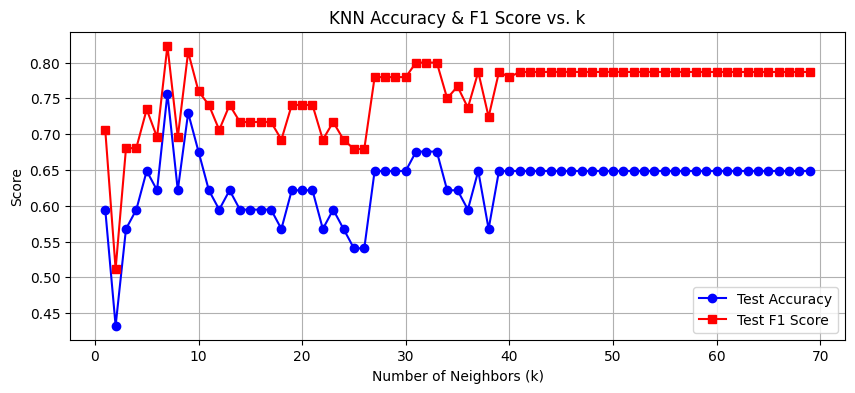

In [65]:
# Plot Accuracy & F1 Score
k_values = list(range(1,70))
plt.figure(figsize=(10, 4))
plt.plot(k_values, accuracy_test_list, marker='o', linestyle='-', color='b', label="Test Accuracy")
plt.plot(k_values, f1_score_test, marker='s', linestyle='-', color='r', label="Test F1 Score")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Score")
plt.title("KNN Accuracy & F1 Score vs. k")
plt.legend()
plt.grid(True)
plt.show()

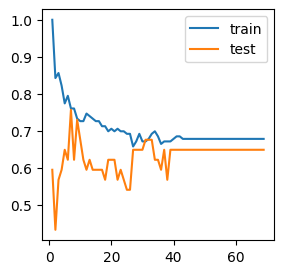

In [66]:
plt.figure(figsize=(3,3))
plt.plot(range(1,70), accuracy_train_list)
plt.plot(range(1,70), accuracy_test_list)
plt.legend(["train","test"])
plt.show()

ValueError: x and y must have same first dimension, but have shapes (29,) and (69,)

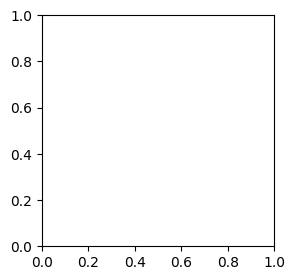

In [67]:
plt.figure(figsize=(3,3))
plt.plot(range(1,30), f1_score_train)
plt.plot(range(1,30), f1_score_test)
plt.legend(["train","test"])
plt.show()

In [69]:
pred = knn.predict(xtest)

In [70]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,confusion_matrix,precision_score, recall_score, f1_score,roc_auc_score,roc_curve
cm = confusion_matrix(ytest,pred)

In [71]:
target_names=["suvive",'died']
print(classification_report(ytest,pred, target_names=target_names))

              precision    recall  f1-score   support

      suvive       0.70      0.54      0.61        13
        died       0.78      0.88      0.82        24

    accuracy                           0.76        37
   macro avg       0.74      0.71      0.72        37
weighted avg       0.75      0.76      0.75        37



In [72]:
cm

array([[ 7,  6],
       [ 3, 21]])

In [73]:
ytest.shape

(37, 1)

<Axes: >

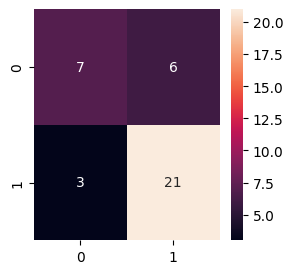

In [74]:
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot= True)

In [ ]:
#tn, fp, fn, tp

In [75]:
16/37

0.43243243243243246

In [76]:
accuracy_score(ytest,pred)

0.7567567567567568

In [77]:
precision_score(ytest,pred)

0.7777777777777778

In [78]:
roc_auc_score(ytest,pred)

np.float64(0.7067307692307692)